In [1]:
import numpy as np
from scipy.special import ellipk

In [2]:
P_by_PE = 1.1

def elastica_fun(K):
    return np.sqrt(P_by_PE) - 2/np.pi*ellipk(K)

In [3]:
elastica_fun(0.75)

-0.32407165244819836

Text(0, 0.5, 'residual')

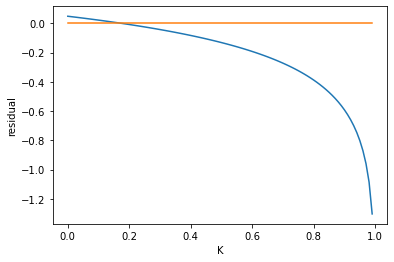

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

K_values = np.arange(0,1,0.01)
elastica_fun(K_values)

plt.plot(K_values,elastica_fun(K_values))
plt.plot(K_values,np.zeros(len(K_values)))
plt.xlabel('K')
plt.ylabel('residual')

In [5]:
from scipy.optimize import root

In [6]:
soln = root(elastica_fun,0.6)
soln

    fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.52917679e-11])
       r: array([0.31033766])
  status: 1
 success: True
       x: array([0.17547397])

In [7]:
K_soln = soln.x[0]
K_soln

0.17547397230811854

In [8]:
elastica_fun(K_soln)

-2.220446049250313e-16

(-1.727090561310988,
 1.7113825980430213,
 -0.00532557484150375,
 0.11183707167157875)

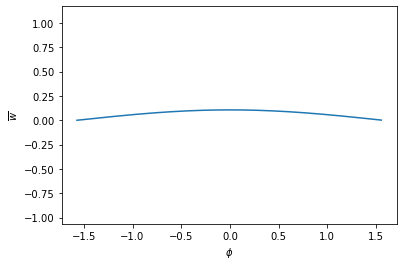

In [9]:
n = 200
phi = np.arange(-np.pi/2,np.pi/2,np.pi/n)

wbar = 2/np.pi*np.sqrt(1/P_by_PE)*np.sqrt(K_soln**2 - K_soln**2*np.sin(phi)**2)

plt.plot(phi,wbar)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\overline{w}$')
plt.axis('equal')